# RIT IMGS 211: Probability and Statistics for Imaging Scientists
### Created by Gabriel J. Diaz

![](https://www.rit.edu/brandportal/sites/rit.edu.brandportal/files/inline-images/new_RIT_full_RGB_hor_k_0.png?export=view&id=XXX)


This is my own version of an introduction to the PandAs module.  

Of course, there are MANY alternatives available through a simple websearch, for example,of, "pandas tutorial."  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## PandAs Series

When working with Pandas, we will usually work with Panda's "DataFrame" object.
 Dataframes can be created from "series".

In [ ]:
series1 = pd.Series([1,2,3])
print(series1)

0    1
1    2
2    3
dtype: int64


Both dataframes and series have "index" that you can use to individual rows of data, or slices of multiple rows at a time

In [ ]:
series1.index

RangeIndex(start=0, stop=3, step=1)

Index don't always have to start at zero!

In [ ]:
series3 = pd.Series([1,2,3],index=[2,3,4])
series3

2    1
3    2
4    3
dtype: int64

If they don't start at zero, you can still use .iloc to index into the Nth row, even if its index is not N.  

Here, the third row has an index of 4.

In [ ]:
series3.iloc[2]

3

Indices dont even have to be numbers.

In [ ]:
series2 = pd.Series([1,2,3],index=['nObservers','nAlgorithms', 'nScenes'])
series2

nObservers     1
nAlgorithms    2
nScenes        3
dtype: int64

In [ ]:
series2['nAlgorithms']

2

One nice feature of Pandas is that you can use built in methods to describe data in a series or dataframe.

In [ ]:
ISO = pd.Series([100,200,400,800])
ISO

0    100
1    200
2    400
3    800
dtype: int64

In [ ]:
ISO.min()

100

In [ ]:
ISO.std()

309.56959368344513

In [ ]:
ISO.describe()

count      4.000000
mean     375.000000
std      309.569594
min      100.000000
25%      175.000000
50%      300.000000
75%      500.000000
max      800.000000
dtype: float64

# Dataframes

A dataframe is like a fancy spreadsheet.

### Creating dataframes

In the next code block, I build one by combining a few series objects.

In [ ]:
ISO = pd.Series([100,200,400,800],name="sensitivity")
noise = pd.Series([0.0025, .0031, .0093, .0104],name="RMS")

camera_properties_DF = ISO.to_frame().join(noise)
camera_properties_DF

,sensitivity,RMS
0,100,0.0025
1,200,0.0031
2,400,0.0093
3,800,0.0104


### Here's another way to do that from Python dictionary objects.

In case you need to review dictionaries:
https://www.geeksforgeeks.org/python-dictionary/

In [ ]:
a_dictionary = {'sensitivity': [100,200,400,800], 'RMS':[0.0025, .0031, .0093, .0104]}

camera_properties_DF = pd.DataFrame(a_dictionary)
camera_properties_DF

,sensitivity,RMS
0,100,0.0025
1,200,0.0031
2,400,0.0093
3,800,0.0104



You can grab an individual row by index using <DataFrame>.loc[index].

Leaving the .loc() out ( <DataFrame>[index] ) will throw an error.


In [ ]:
# This throws an error
# camera_properties_DF[2]

# This does not
camera_properties_DF.loc[2]

sensitivity    400.0000
RMS              0.0093
Name: 2, dtype: float64

You don't need <DataFrame>.loc() to grab multiple rows.  Quirky, I know.

In [ ]:
camera_properties_DF[1:4]

,sensitivity,RMS
1,200,0.0031
2,400,0.0093
3,800,0.0104


You can also grab row(s) by row number, where 0 is the first row, using <DataFrame>.iloc[row_number]

In [ ]:
camera_properties_DF.iloc[3]

sensitivity    800.0000
RMS              0.0104
Name: 3, dtype: float64

In [ ]:
camera_properties_DF.iloc[3:5]

,sensitivity,RMS
3,800,0.0104


You can grab rows using logical indexing, too!
Here, I use a logical operator `==` to find all rows in which sensitivity is 800.

In [ ]:
camera_properties_DF[ camera_properties_DF['sensitivity'] == 800 ]

,sensitivity,RMS
3,800,0.0104


# Let's use seaborn to explore our data!

In [ ]:
import seaborn as sns

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Plots of categorical data

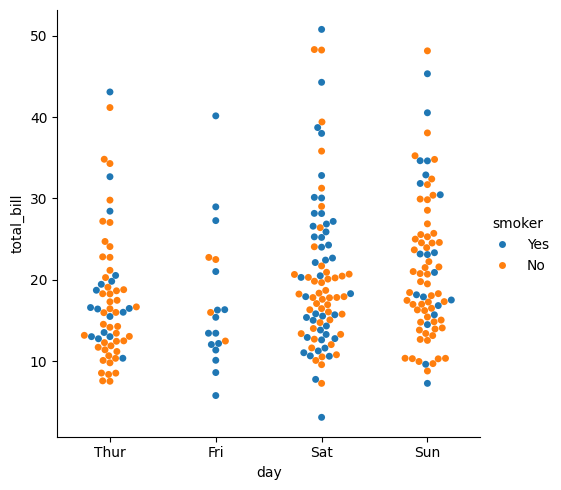

In [ ]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

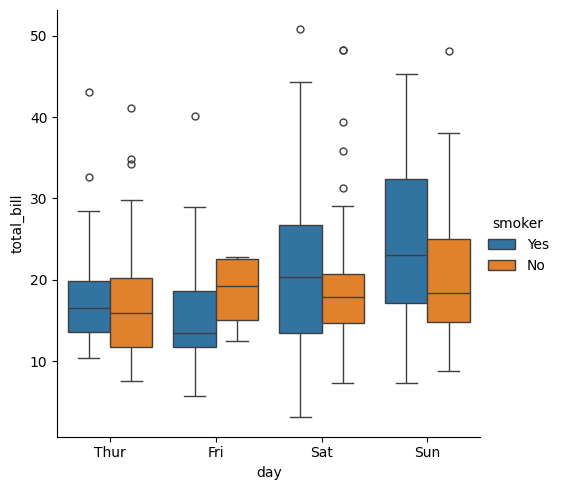

In [ ]:
sns.catplot(data=tips, kind="box", x="day", y="total_bill", hue="smoker")

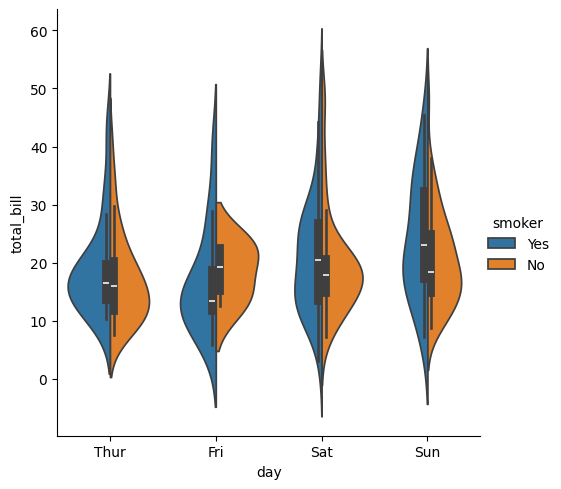

In [ ]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

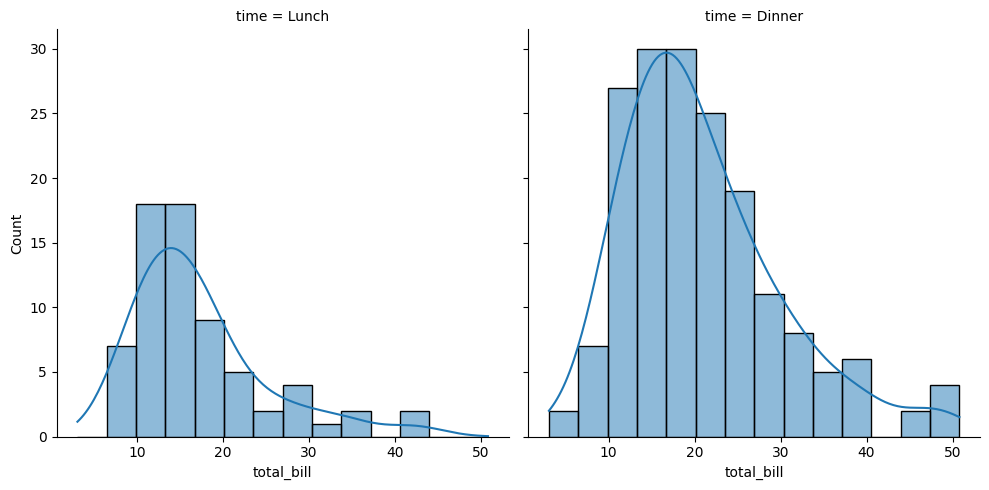

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)



# Below this line

...I demonstrate some advanced Pandas techniques, which were necessary to plot the data using Seaborn.  This demonstrates some of the compliations with Pandas.  Sometimes, methods want the data organized in certain ways!  

Anyhow, the context is informative, espeically since it is an exploration of REAL data with real relevance.  Have a look!

---



### You can also create dataframes from CSV files

Below, I import data from a 538 article on "The Lasting Legacy of Redlining"

Here's the story:
https://projects.fivethirtyeight.com/redlining/

Here's the github repo:
https://github.com/fivethirtyeight/data/tree/master/redlining

From the repo:

"metro-grades.csv contains 2020 population total estimates by race/ethnicity for combined zones of each redlining grade (from Home Owners' Loan Corporation [HOLC] maps originally drawn in 1935-40, downloaded from the Mapping Inequality project) within micro- and metropolitan areas. Also included are population estimates in the surrounding area of each metropolitan area's HOLC map (computed by adding a 10 percent buffer radius to the minimum bounding circle of all zones in that metro area) and location quotients (LQs) for each racial/ethnic group and HOLC grade. LQs are small-area measures of segregation that specifically compare one racial/ethnic group’s proportion in a granular geography to their proportion in a larger surrounding geography. An LQ above 1 for a given racial group indicates overrepresentation in that HOLC zone relative to the broader surrounding area, and values below 1 indicate underrepresentation.

Population and race/ethnicity data comes from the 2020 U.S. decennial census. White, Black and Asian data excludes those who indicated Hispanic or Latino ethnicity. Hispanic/Latino data includes all who indicated Hispanic or Latino ethnicity, regardless of race. Other race data includes all population counts that did not fall under white, Black, Asian or Latino groups.

Only micro- and metropolitan areas with both A- (“best”) and D-rated (“hazardous”) zones in their redlining map are included — 138 of a total 143 metropolitan areas in the data from Mapping Inequality."

In [ ]:
fpath = "https://raw.githubusercontent.com/fivethirtyeight/data/master/redlining/metro-grades.csv"

dataFrame = pd.read_csv(fpath)
dataFrame.head(20)

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_white_pop,surr_area_black_pop,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
0,"Akron, OH",A,24702,8624,956,688,1993,36963,66.83,23.33,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
1,"Akron, OH",B,41531,16499,2208,3367,4211,67816,61.24,24.33,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
2,"Akron, OH",C,73105,22847,3149,6291,7302,112694,64.87,20.27,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
3,"Akron, OH",D,6179,6921,567,455,1022,15144,40.80,45.70,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
4,"Albany-Schenectady-Troy, NY",A,16989,1818,1317,1998,1182,23303,72.91,7.80,...,387016,68371,42699,41112,40596,66.75,11.79,7.36,7.09,7.00
5,"Albany-Schenectady-Troy, NY",B,26644,7094,4334,2509,4650,45230,58.91,15.68,...,387016,68371,42699,41112,40596,66.75,11.79,7.36,7.09,7.00
6,"Albany-Schenectady-Troy, NY",C,56878,16795,10357,6355,11153,101538,56.02,16.54,...,387016,68371,42699,41112,40596,66.75,11.79,7.36,7.09,7.00
7,"Albany-Schenectady-Troy, NY",D,16806,19581,6688,2191,4364,49630,33.86,39.45,...,387016,68371,42699,41112,40596,66.75,11.79,7.36,7.09,7.00
8,"Allentown-Bethlehem-Easton, PA-NJ",A,1076,71,367,21,82,1616,66.56,4.38,...,69477,7364,30164,3524,4753,60.27,6.39,26.17,3.06,4.12
9,"Allentown-Bethlehem-Easton, PA-NJ",B,16774,1962,7935,731,1396,28798,58.25,6.81,...,69477,7364,30164,3524,4753,60.27,6.39,26.17,3.06,4.12


In [ ]:
len(dataFrame)

551

List all the columns

In [ ]:
list(dataFrame)

['metro_area',
 'holc_grade',
 'white_pop',
 'black_pop',
 'hisp_pop',
 'asian_pop',
 'other_pop',
 'total_pop',
 'pct_white',
 'pct_black',
 'pct_hisp',
 'pct_asian',
 'pct_other',
 'lq_white',
 'lq_black',
 'lq_hisp',
 'lq_asian',
 'lq_other',
 'surr_area_white_pop',
 'surr_area_black_pop',
 'surr_area_hisp_pop',
 'surr_area_asian_pop',
 'surr_area_other_pop',
 'surr_area_pct_white',
 'surr_area_pct_black',
 'surr_area_pct_hisp',
 'surr_area_pct_asian',
 'surr_area_pct_other']

### Get a column of data

In [ ]:
dataFrame['metro_area']

0                              Akron, OH
1                              Akron, OH
2                              Akron, OH
3                              Akron, OH
4            Albany-Schenectady-Troy, NY
                     ...                
546                     York-Hanover, PA
547    Youngstown-Warren-Boardman, OH-PA
548    Youngstown-Warren-Boardman, OH-PA
549    Youngstown-Warren-Boardman, OH-PA
550    Youngstown-Warren-Boardman, OH-PA
Name: metro_area, Length: 551, dtype: object

It looks like it summarized some data there!  Can we see it all?

In [ ]:
# list(dataFrame['metro_area'])

## Index into the rows tha describe Rochester, NY
Lots of NY cities, including Rochester!  Let's have a look.

In [ ]:
dataFrame[ dataFrame['metro_area'] == "Rochester, NY" ]

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_white_pop,surr_area_black_pop,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
396,"Rochester, NY",A,10306,476,557,439,654,12433,82.89,3.83,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
397,"Rochester, NY",B,24215,14682,4947,1811,2507,48161,50.28,30.48,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
398,"Rochester, NY",C,64342,48070,30238,4395,8099,155143,41.47,30.98,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
399,"Rochester, NY",D,6230,16269,8421,842,1663,33424,18.64,48.67,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84


### Get a row of data by index

We can also index into those rows using index (now that we know what it is!)

rochData_df is a "slice" of the larger dataframe.  It is just a pointer to the relevant rows of the larger dataframe, "dataframe."  

In [ ]:
rochData_df = dataFrame[396:400]
rochData_df

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_white_pop,surr_area_black_pop,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
396,"Rochester, NY",A,10306,476,557,439,654,12433,82.89,3.83,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
397,"Rochester, NY",B,24215,14682,4947,1811,2507,48161,50.28,30.48,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
398,"Rochester, NY",C,64342,48070,30238,4395,8099,155143,41.47,30.98,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
399,"Rochester, NY",D,6230,16269,8421,842,1663,33424,18.64,48.67,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84


# To simplify indexing, reset the index so that it starts at zero

This works, but see that it moves the old index to a new column that we might not want to hand around.

In [ ]:
rochData_df.reset_index(0)

,index,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,...,surr_area_white_pop,surr_area_black_pop,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
0,396,"Rochester, NY",A,10306,476,557,439,654,12433,82.89,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
1,397,"Rochester, NY",B,24215,14682,4947,1811,2507,48161,50.28,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
2,398,"Rochester, NY",C,64342,48070,30238,4395,8099,155143,41.47,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
3,399,"Rochester, NY",D,6230,16269,8421,842,1663,33424,18.64,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84


Note that the newly indexed dataframe created in the previous block is not stored anywhere, and so the change will not hold unless we assigned to a variable.  Below, I demonstrate a few ways to reset the index, assign the newly indexed dataframe to a variable, and to remove the new 'index' column


In [ ]:
# assign to a new variable name `re_indexed_rochData_df` while dropping the `index` column
rochData_df = dataFrame[396:400]
re_indexed_rochData_df = rochData_df.reset_index(0,drop='index')

# Two methods to keep the same variable name
rochData_df = dataFrame[396:400]
rochData_df = rochData_df.reset_index(0, drop='index')

rochData_df = dataFrame[396:400]
rochData_df.reset_index(0, drop='index',inplace=True)

rochData_df

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_white_pop,surr_area_black_pop,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
0,"Rochester, NY",A,10306,476,557,439,654,12433,82.89,3.83,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
1,"Rochester, NY",B,24215,14682,4947,1811,2507,48161,50.28,30.48,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
2,"Rochester, NY",C,64342,48070,30238,4395,8099,155143,41.47,30.98,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
3,"Rochester, NY",D,6230,16269,8421,842,1663,33424,18.64,48.67,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84


### Reorganize the dataset into a configuration that seaborn can play with

This isn't ideal for instruction, but it turns out that this dataset is organized in a way that isn't Seaborn-compatible.  I fix that below.  It's not a technique that's going to come up often, and so I suggest that you skip to the next section in which I plot the data.

In [ ]:
rochData_df = dataFrame[396:400]
rochData_df.reset_index(0, drop='index',inplace=True)

def stack_holc_data(row_in):
  df1 = pd.DataFrame(row_in)
  df1['holc_grade'] = df1.loc['holc_grade'].values[0]
  df1.drop(['metro_area'],axis=0)
  df1.drop(['holc_grade'],axis=0)
  return df1


stacked_df = pd.concat([stack_holc_data(row_data) for row_idx, row_data in rochData_df.iterrows()])
stacked_df



,0,holc_grade,1,2,3
metro_area,"Rochester, NY",A,NaN,NaN,NaN
holc_grade,A,A,NaN,NaN,NaN
white_pop,10306,A,NaN,NaN,NaN
black_pop,476,A,NaN,NaN,NaN
hisp_pop,557,A,NaN,NaN,NaN
...,...,...,...,...,...
surr_area_pct_white,NaN,D,NaN,NaN,55.6
surr_area_pct_black,NaN,D,NaN,NaN,22.18
surr_area_pct_hisp,NaN,D,NaN,NaN,13.28
surr_area_pct_asian,NaN,D,NaN,NaN,4.09


In [ ]:

rochData_dfB = rochData_df.set_index('holc_grade')
rochData_dfB

,metro_area,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,pct_hisp,...,surr_area_white_pop,surr_area_black_pop,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
holc_grade,,,,,,,,,,,,,,,,,,,,,
A,"Rochester, NY",10306,476,557,439,654,12433,82.89,3.83,4.48,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
B,"Rochester, NY",24215,14682,4947,1811,2507,48161,50.28,30.48,10.27,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
C,"Rochester, NY",64342,48070,30238,4395,8099,155143,41.47,30.98,19.49,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84
D,"Rochester, NY",6230,16269,8421,842,1663,33424,18.64,48.67,25.19,...,248955,99333,59483,18333,21660,55.6,22.18,13.28,4.09,4.84


In [ ]:

pct_roch_pop_df = rochData_dfB[['pct_white','pct_black','pct_hisp','pct_asian','pct_other']]
pct_roch_pop_df = pd.melt(pct_roch_pop_df.reset_index(),['holc_grade'])
pct_roch_pop_df.columns = ['holc grade','demographic','percent']
pct_roch_pop_df['demographic'] = [a_string[4:] for a_string in pct_roch_pop_df['demographic'].values]

pct_roch_pop_df.head()

,holc grade,demographic,percent
0,A,white,82.89
1,B,white,50.28
2,C,white,41.47
3,D,white,18.64
4,A,black,3.83


# Plot!

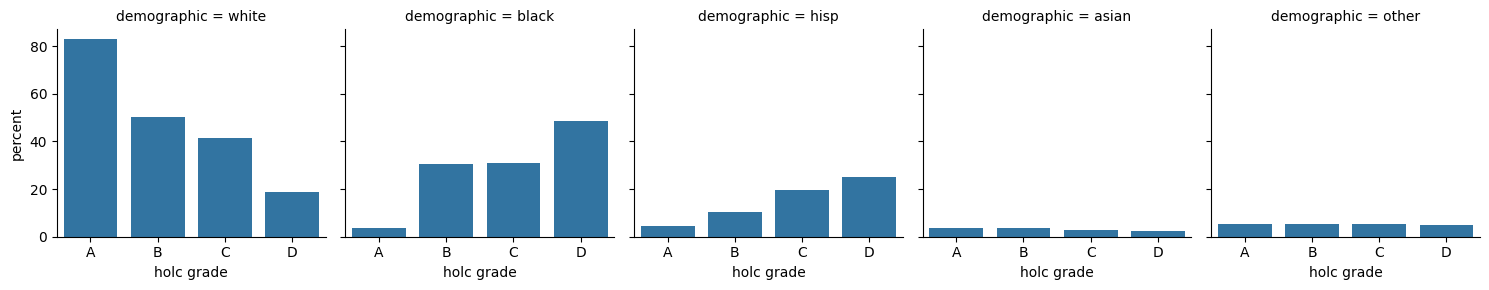

In [ ]:
# Prepare a figure with subplots according to demographic
g = sns.FacetGrid(pct_roch_pop_df, col="demographic")

# Define what plotting function to map onto each subplot
g.map_dataframe(sns.barplot, x='holc grade',y="percent")

Interesting code, but dissapointing information, no?

Some scrap code below that I may return to.

In [ ]:
def stack_holc_data_bigdf(row_in):
  df1 = pd.DataFrame(row_in)
  df1['holc_grade'] = df1.loc['holc_grade'].values[0]
  df1.drop(['metro_area'],axis=0)
  df1.drop(['holc_grade'],axis=0)
  return df1

# stacked_big_df = pd.concat([stack_holc_data(row_data) for row_idx, row_data in dataFrame.iterrows()])
# stacked_big_df.reset_index(0, drop='index',inplace=True)

# pct_pop_df = stacked_big_df[['pct_white','pct_black','pct_hisp','pct_asian','pct_other']]
# pct_pop_df = pd.melt(pct_pop_df.reset_index(),['holc_grade'])
# pct_pop_df.columns = ['holc grade','demographic','percent']
# pct_pop_df['demographic'] = [a_string[4:] for a_string in pct_pop_df['demographic'].values]

# pct_pop_df.head()

In [ ]:
# # def stack_holc_data(row_in):

# # stacked_big_df = pd.concat([stack_holc_data(row_data) for row_idx, row_data in dataFrame.iterrows()])
# # stacked_big_df.reset_index(0, drop='index',inplace=True)

# dataFrame = pd.read_csv(fpath)
# dataFrame.reset_index(0, drop='index',inplace=True)
# row_in = dataFrame.iloc[10]

# df1 = pd.DataFrame(row_in)
# df1['holc_grade'] = df1.loc['holc_grade'].values[0]
# # df1.drop(['metro_area'],axis=0)
# # df1.drop(['holc_grade'],axis=0)

# df1['metro_area']
# # df1.drop(['metro_area'],axis=0)